<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   Number of times pregnant                                                  768 non-null    int64  
 1   Plasma glucose concentration a 2 hours in an oral glucose tolerance test  768 non-null    int64  
 2   Diastolic blood pressure (mm Hg)                                          768 non-null    int64  
 3   Triceps skin fold thickness (mm)                                          768 non-null    int64  
 4   2-Hour serum insulin (mu U/ml)                                            768 non-null    int64  
 5   Body mass index (weight in kg/(height in m)^2)                            768 non-null    float64
 6   Diabetes pedigree function                                         

C:\Users\SHAELLEY\AppData\Local\Temp\ipykernel_15652\905653248.py:21: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[columns_with_missing] = data[columns_with_missing].fillna(data[columns_with_missing].median())


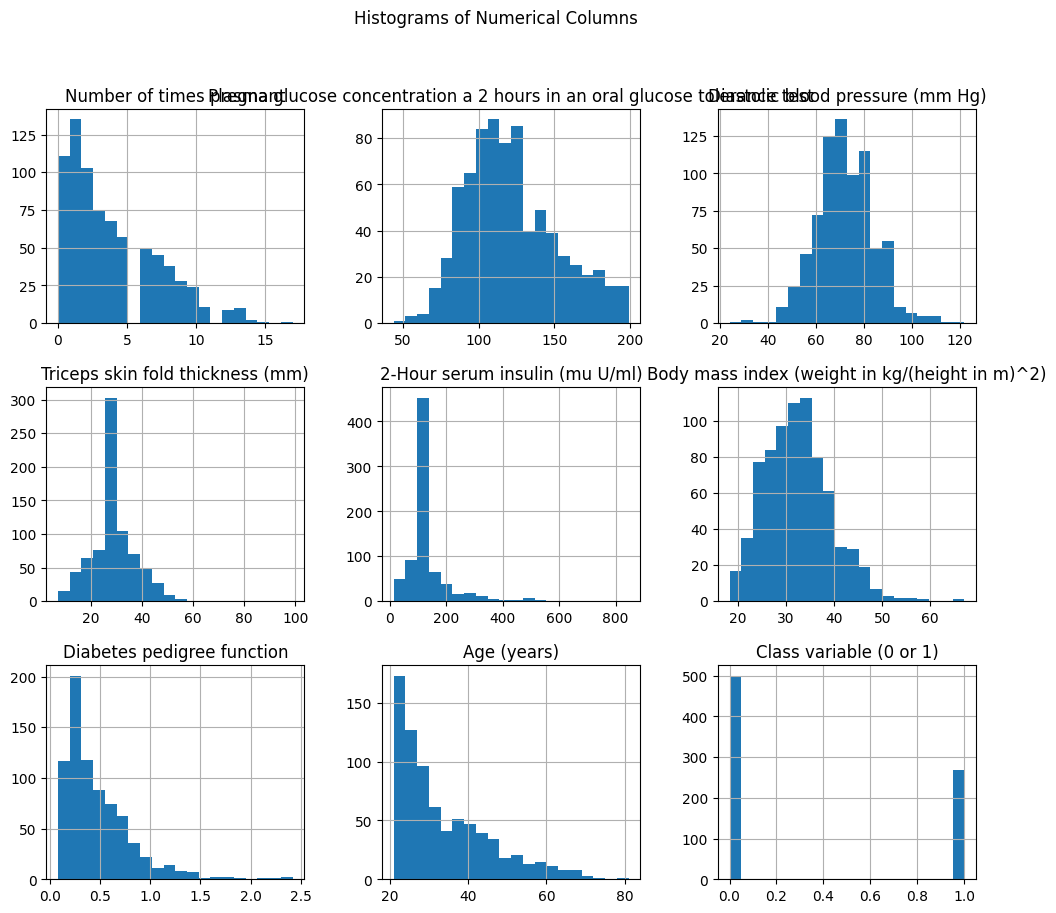

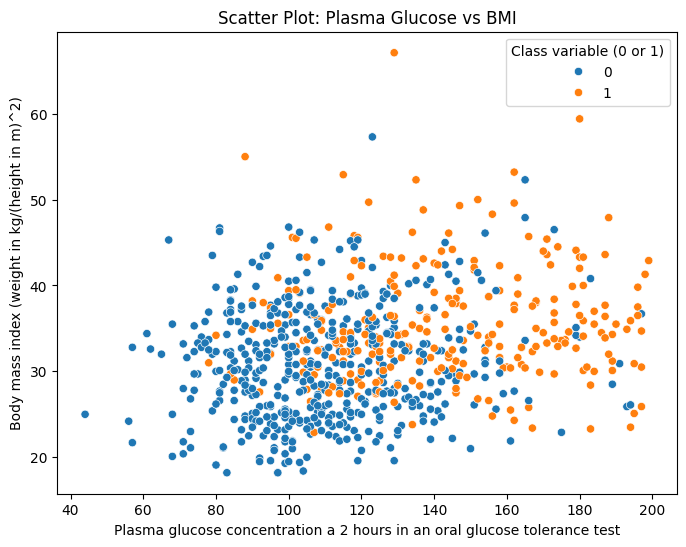

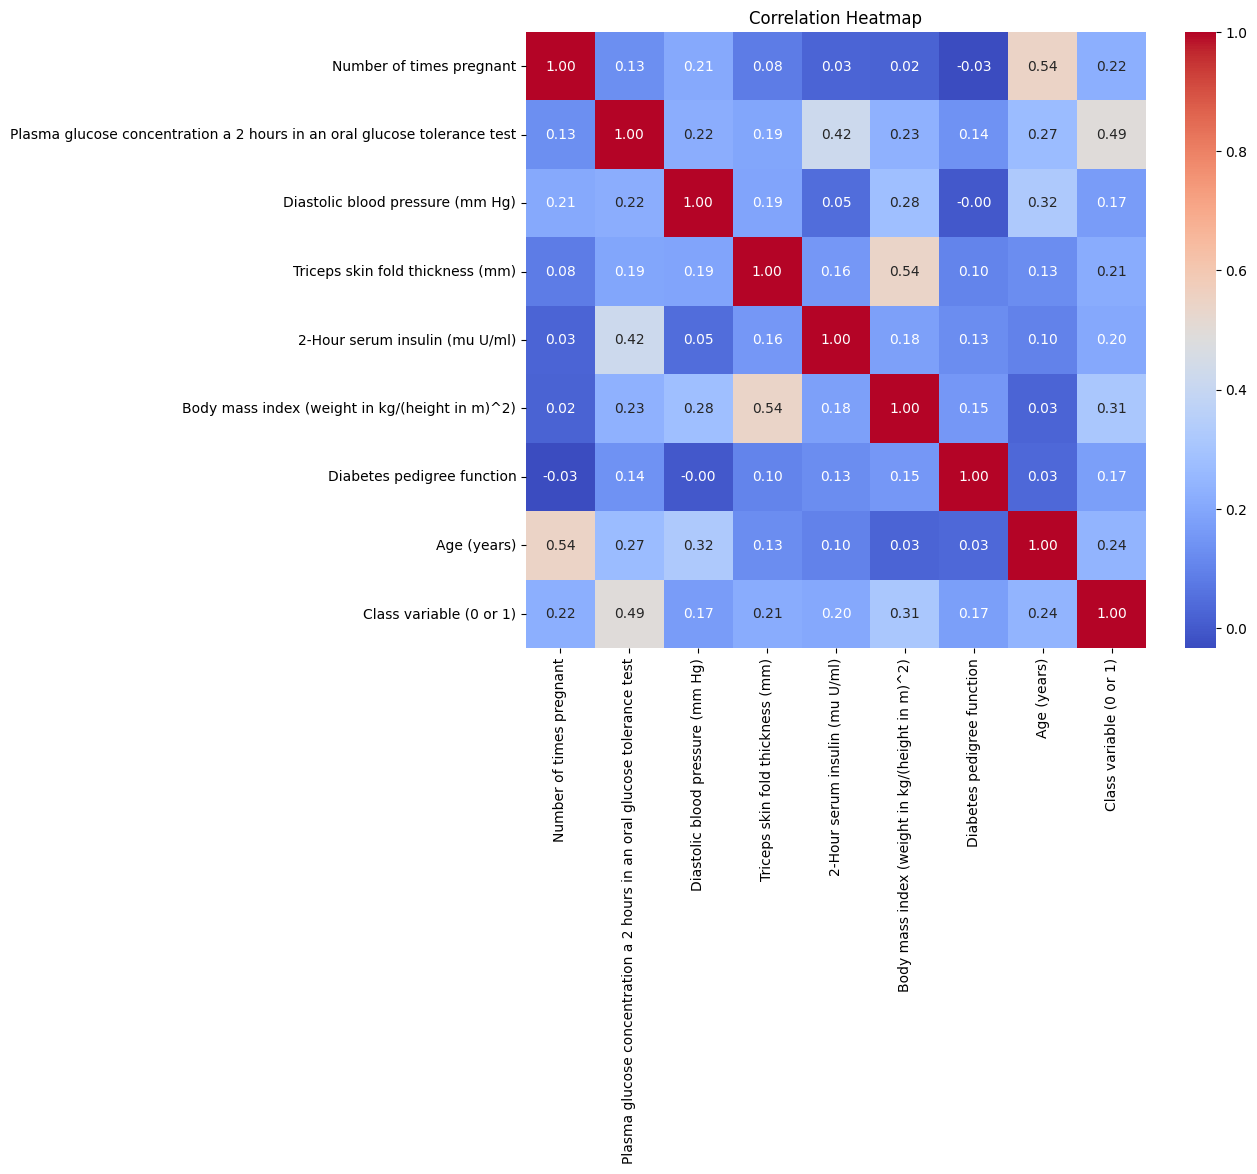

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns  

pd.set_option('display.max_columns', None)
data = pd.read_csv('C:/Users/SHAELLEY/Scientific Computing/Scientific-Computing/kaggle/Pima Indians Diabetes Database.csv')

print(data.info())
print(data.isnull().sum())
print(data.describe())

columns_with_missing = [
    'Plasma glucose concentration a 2 hours in an oral glucose tolerance test',
    'Diastolic blood pressure (mm Hg)',
    'Triceps skin fold thickness (mm)',
    '2-Hour serum insulin (mu U/ml)',
    'Body mass index (weight in kg/(height in m)^2)'
]
data[columns_with_missing] = data[columns_with_missing].replace(0, pd.NA)
data[columns_with_missing] = data[columns_with_missing].fillna(data[columns_with_missing].median())
print(data.isnull().sum())

# Step 4: Handle outliers
def detect_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column[(column < lower_bound) | (column > upper_bound)]

    for column in data.columns[:-1]:
        outliers = detect_outliers(data[column])
        print(f"Outliers in {column}: {len(outliers)}")
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data[column] = data[column].clip(lower_bound, upper_bound)

    # Step 5: Compute key statistics
print(data.describe())
print(data.corr())
# Step 6: Generate visualizations
data.hist(figsize=(12, 10), bins=20)
plt.suptitle("Histograms of Numerical Columns")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Plasma glucose concentration a 2 hours in an oral glucose tolerance test', 
                y='Body mass index (weight in kg/(height in m)^2)', 
                hue='Class variable (0 or 1)', 
                data=data)
plt.title("Scatter Plot: Plasma Glucose vs BMI")
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
